In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


# Baseline models for Glimpse K12. 

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

# Baseline models for dfs with continuous outcome variables = linear regression. 

### Read in the data

In [3]:
most_obs = pd.read_csv('most_obs_cont.csv')
most_feats = pd.read_csv('most_feats_cont.csv')

### Set up dfs for predictor and outcome variables 

In [4]:
mostObs_MathOutc = most_obs['ScantronMathPostTest']
mostObs_ReadOutc = most_obs['ScantronReadingPostTest']
mostObs_pred = most_obs.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

### Recode categorical strings with number labels and save those dictionaries

In [5]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

### Packages, functions, and algorithms. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Predicting outcomes for using the 'most observations' df. 

Mean Absolute Error: 1114.5304889026581
Mean Squared Error: 1455149.3343023139
Root Mean Squared Error: 1206.2957076531086
R^2 Math:, 0.1294116115239885


Text(0, 0.5, 'Predicted')

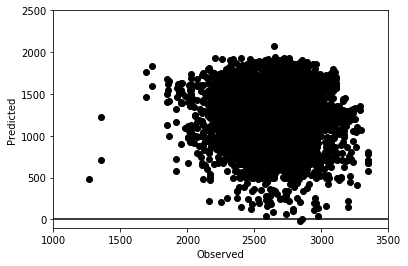

In [14]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')
plt.pyplot.scatter(y_test, y_pred, color='black')
plt.pyplot.xlim(1000, 3500)
plt.pyplot.ylim(-100, 2500)
plt.pyplot.xlabel('Observed')
plt.pyplot.ylabel('Predicted')

Mean Absolute Error: 1193.4802467875047
Mean Squared Error: 1697024.1614503476
Root Mean Squared Error: 1302.6987992050763
R^2 Reading:, 0.12321312706062704


Text(0, 0.5, 'Predicted')

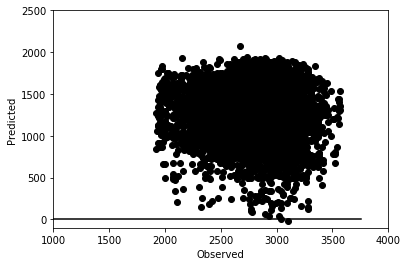

In [16]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')
plt.pyplot.scatter(y_test, y_pred, color='black')
plt.pyplot.xlim(1000, 4000)
plt.pyplot.ylim(-100, 2500)
plt.pyplot.xlabel('Observed')
plt.pyplot.ylabel('Predicted')

### Predicting outcomes for using the 'most features' df. 

Mean Absolute Error: 118.58885939767453
Mean Squared Error: 98614.70838888134
Root Mean Squared Error: 314.02978901512085
R^2 Math:, 0.32298406962202986


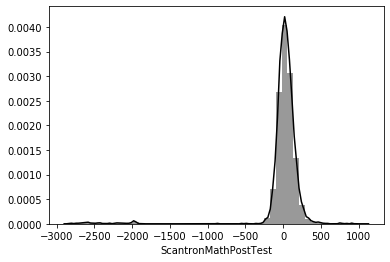

In [9]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

Mean Absolute Error: 206.9937530189295
Mean Squared Error: 192530.2368452808
Root Mean Squared Error: 438.78267609977587
R^2 Reading:, 0.4257221978037906


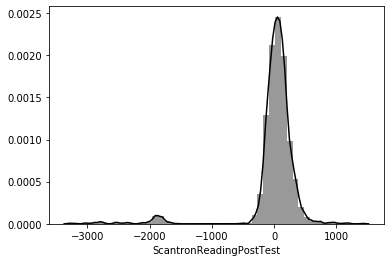

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

# Baseline models for dfs with binary outcome variables = logistics regression. 

### Read in data

In [11]:
most_obs = pd.read_csv('most_obs_binary.csv')
most_feats = pd.read_csv('most_feats_binary.csv')

In [12]:
mostObs_MathOutc = most_obs['ScantronMathPostTestBenchmarks']
mostObs_ReadOutc = most_obs['ScantronReadingPostTestBenchmarks']
mostObs_pred = most_obs.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTestBenchmarks']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTestBenchmarks']
mostFeats_pred = most_feats.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)

In [13]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [15]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size

### Predicting outcomes for the 'most observations ' df. 

Accuracy: 0.784182776801406
Precision: 0.8529284164859002
Recall: 0.6886164623467601
ROC_AUC:, 0.7845198713850203
F1: 0.762015503875969


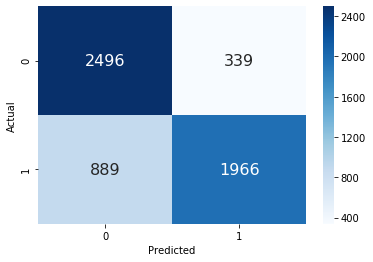

In [16]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
# Math metrics
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

Accuracy: 0.7644991212653779
Precision: 0.7752388087656864
Recall: 0.9672820752512269
ROC_AUC:, 0.5584107045285192
F1: 0.8606778956123934


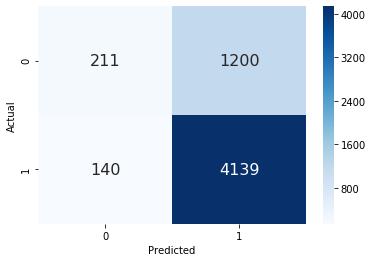

In [17]:
# Read outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
# Read metrics
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

## Predicting outcomes for the 'most features' df. 

Accuracy: 0.7794561933534743
Precision: 0.8565346956151554
Recall: 0.6899862825788752
ROC_AUC:, 0.7828389546424439
F1: 0.764292497625831


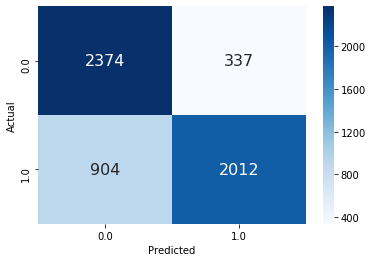

In [18]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

Accuracy: 0.771636751377288
Precision: 0.7722949937197201
Recall: 0.9962962962962963
ROC_AUC:, 0.5126852560287909
F1: 0.8701101789143839


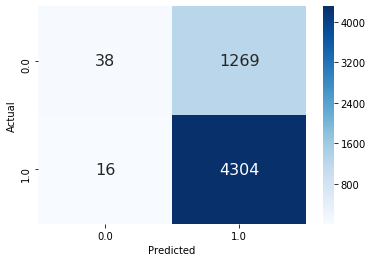

In [19]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)